<a href="https://colab.research.google.com/github/Hoggnation/cataloging_coherent_oscillators/blob/main/Filtering_Function_on_KIC_7917485.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lightkurve
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 50.0 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=eb87c65780a3257c62dfd90b08cdd4a9913c6b26f6abbadd8ac5328c6bf11386
  Stored in directory: /root/.cache/pip/wheels/71/ae/f7/5b7e1e16a133d094431428169e9a8d9f750afe54

In [2]:
#this means only look at top ten frequencies/peaks
num_of_peaks = 10

In [3]:
search_result = lk.search_lightcurve('KIC 7917485', mission='Kepler')
lc_collection = search_result.download_all()

In [4]:
#array of time differences, find its median, use it to calculate the max frequency
lc = lc_collection.stitch()  # Combine all light curves in lc_collection
sampling_rate_days= np.median(np.diff(lc.time))
sampling_rate_days_no_units = sampling_rate_days.value #get rid of units
f_max = 1 / (sampling_rate_days) #in days
f_max_no_units = f_max.value #get rid of units (but it's actually in 1/days)

print(sampling_rate_days_no_units)
print(f_max_no_units)
print(sampling_rate_days)

0.02043365134159103
48.938879463240205
0.02043365134159103


In [5]:
#check there is no unit
print(type(f_max_no_units), type(sampling_rate_days_no_units))

<class 'numpy.float64'> <class 'numpy.float64'>


In [6]:
#find total observation time, use it to find minimum frequency
total_observation_time = lc.time[-1] - lc.time[0] # in days
f_min = f_min = 1/ total_observation_time # in days
f_min_no_units = f_min.value #strip units (but are in 1/days)
print(f_min_no_units)
print(type(f_min_no_units))

0.0006800582252348119
<class 'numpy.float64'>


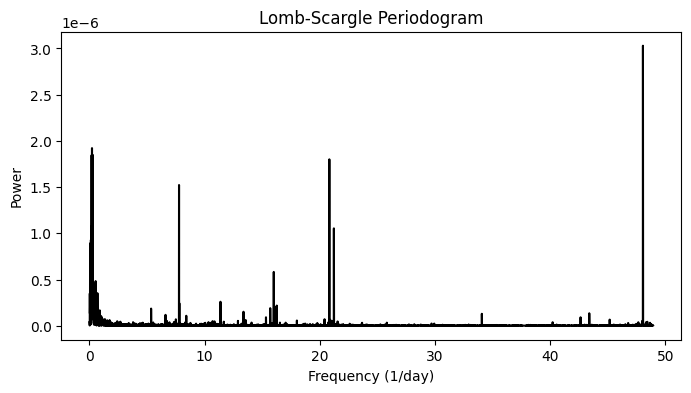

In [7]:
#trying to create periodograms with no units by manually plotting
#use lightcurve called lc to make periogram pg
pg = lc.to_periodogram(
    method='lombscargle',
    normalization='psd',
    minimum_frequency=f_min_no_units,
    maximum_frequency=f_max_no_units
)

power_no_units = np.array(pg.power.value) # an array of powers of the ligthcurve
freq_no_units = np.array(pg.frequency.value) # array of freqs of lightcurve
plt.figure(figsize=(8, 4))
plt.plot(freq_no_units, power_no_units, 'k-')  # Black line
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram")
plt.show()

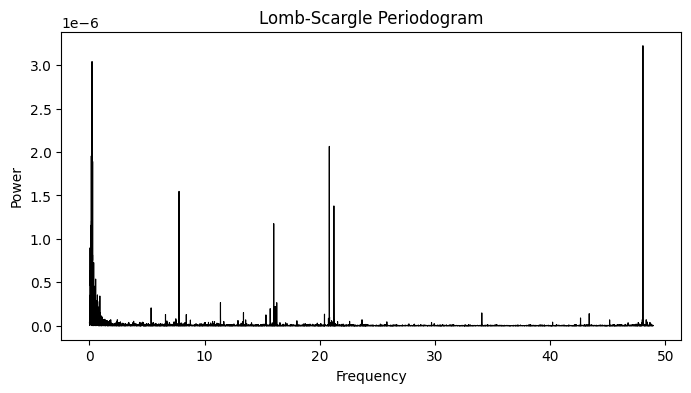

In [8]:
#trying to create periodograms of spacing f_min
frequency_grid = np.arange(f_min_no_units, f_max_no_units, f_min_no_units) #spacing with increments of f_min, starting with f_min_no_units to avoid di

#create periodogram only to get values in order to remove units
pg_spacing_fmin = lc.to_periodogram(
    method='lombscargle',
    normalization='psd',
    frequency=frequency_grid  # Unitless frequency grid
)

freq_values = np.array(pg_spacing_fmin.frequency.value)  # Remove units
power_values = np.array(pg_spacing_fmin.power.value)  # Remove units

plt.close('all')

plt.figure(figsize=(8, 4))
plt.plot(freq_values, power_values, 'k-', lw=0.8)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram")

plt.show()

In [9]:
import numpy as np
from scipy.signal import find_peaks

In [10]:
def get_started(num_of_peaks, xs, ys):
    """

    Identifies and returns the indices of the highest peaks in a given dataset.

    Args:
        num_of_peaks (int): The number of highest peaks to return.
        xs (numpy.ndarray): The x-axis values
        ys (numpy.ndarray): The y-axis values

    Returns:
        numpy array: An array of indices corresponding to the highest peaks in `ys`.

    Bugs:
        `num_of_peaks` cannot be greater than the number of detected peaks
        `xs` or `ys` must be NumPy array


    """
    indxs, properties = find_peaks(ys)
    return indxs[np.argsort(-ys[indxs])[:num_of_peaks]]

In [11]:
indices = get_started(num_of_peaks, freq_values, power_values)
print(indices)

[70662   329   283   308 30623   236   404   376 11436 31207]


In [12]:
def check_inputs(xs):
    """

    Checks whether the input array `xs` is sorted in ascending order.

    Args:
        xs (numpy.ndarray or list): The input array to check.

    Returns:
        bool: `True` if `xs` is sorted in ascending order, otherwise `False`.

    """
    for i in range(len(xs)-1):
        if xs[i] > xs[i+1]:
            print("check_inputs(): input xs is badly ordered. Use reorder_inputs to reorder")
            return False
    return True

In [13]:
def reorder_inputs(xs,ys):
    """

    Reorders the input arrays `xs` and `ys` in ascending order of `xs`.

    Args:
        xs (numpy.ndarray): The x-axis values
        ys (numpy.ndarray): The y-axis values

    Returns:
        tuple of numpy arrays (sorted xs, sorted ys)

    Bugs:
        `xs` or `ys` must be NumPy array
        `xs` and `ys`must be same length

    """
    i = np.argsort(xs)
    return xs[i], ys[i]


In [14]:
#xlist is the teh index left to highest peak, highest peak, and the index right to teh highest peak
def design_matrix(xlist):
    """

    Constructs a design matrix for quadratic curve fitting.

    Args:
        xs (numpy.ndarray): The x-axis values

    Returns:
        3 x 3 design matrix of numpy arrays

    Bugs:
        xlist must be an numpy array

    Note:
        Note the factor of 0.5 that Hogg likes and no one else
        Also assumes xlist is ordered

    """
    return (np.vstack((xlist**0,xlist**1,0.5*xlist**2))).T

In [15]:
def fit_parabola(xs, ys, index):
    """

    Fits a quadratic function to three consecutive data points. Solves for coefficients (b,m,q) in the quadratic
    f(x) = b + m*x + (1/2) * q * x^2

    Args:
        xs (numpy.ndarray): The x-axis values
        ys (numpy.ndarray): The y-axis values
        index (int): The index of peak


    Returns:
        tuple: (b, m, q)

    Bugs:
        index-1` or `index+2` can't be out of bounds
        ``xs` or `ys` must be NumPy array


    """
    return np.linalg.solve(design_matrix(xs[index-1:index+2]), ys[index-1:index+2])

In [16]:
def refine_peak(xs, ys, index):
    """

    Refines the peak position using quadratic fit

    Args:
        xs (numpy.ndarray): The x-axis values
        ys (numpy.ndarray): The y-axis values
        index (int): The index of peak

    Returns:
        tuple: (x position of refined peak, y position of refined peak)

    Bugs:
        Must be synchronized with the design matrix


    """
    b,m,q = fit_parabola(xs, ys, index)
    x_peak = -m / q
    return x_peak, 0.5 * q * (x_peak) ** 2 + m * (x_peak) + b

In [17]:
def refine_peaks(xs, ys, indices):
    """

    Refines the peak position for a set of indices using quadratic fit

    Args:
        xs (numpy.ndarray): The x-axis values
        ys (numpy.ndarray): The y-axis values
        indices (numpy array): indices of the peaks (this should be the output of get_started()

    Returns:
        tuple of numpy arrays (array of refined x positions, array of refined y positions


    """
    foo = lambda i: refine_peak(xs,ys,i)
    xs_refined, ys_refined = zip(*list(map(foo,indices)))
    return np.array(xs_refined), np.array(ys_refined)

In [18]:
new_positions = refine_peaks(freq_values, power_values, indices) # this returns the new x values
#and the new y values

In [19]:
print (new_positions)

(array([48.05475521,  0.22467758,  0.19316354,  0.21025306, 20.82583281,
        0.1615085 ,  0.27557164,  0.25647415,  7.77780489, 21.22323902]), array([3.23032276e-06, 3.04926063e-06, 3.01287734e-06, 2.20810321e-06,
       2.07275311e-06, 1.96647188e-06, 1.89357902e-06, 1.73434158e-06,
       1.54695314e-06, 1.37923269e-06]))


In [20]:
#originally the new positions function was returning the refined peaks and powers as seperate arrays, now they are arranged as tuples so that the zip function works
new_frequencies, new_powers = refine_peaks(freq_values, power_values, indices)
new_positions = list(zip(new_frequencies, new_powers))
refined_frequencies, refined_powers = zip(*new_positions)

In [21]:
refined_frequencies, refined_powers = zip(*new_positions)

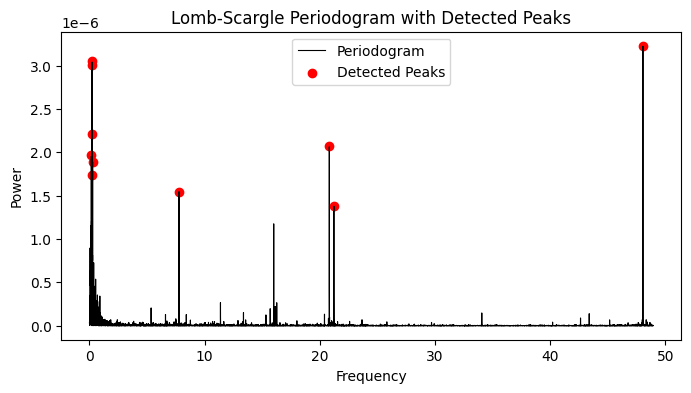

In [22]:
plt.figure(figsize=(8, 4))

plt.plot(freq_values, power_values, 'k-', lw=0.8, label="Periodogram")

plt.scatter(refined_frequencies, refined_powers, color='red', marker='o', label="Detected Peaks")

plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram with Detected Peaks")
plt.legend()

plt.show()

Frequency range: 0.16150849538012194 to 48.054755206844284
Amplitude range: 1.379232685394527e-06 to 3.2303227612828778e-06
Frequency range: 0.0006800582252348119 to 48.938350004347534
Amplitude range: 2.351133008328859e-15 to 3.223881659808021e-06
Best-fit parameters: A = 4.5984981501656297e-10, mu = 0.45707549657153274, sigma = 12.686758032055913
Chi-squared: 0.0007492698317368908


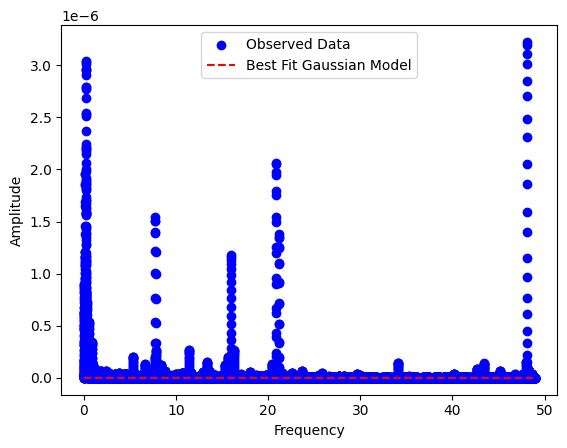

In [23]:
from scipy.optimize import minimize

# Refined data for our expected model
ref_frequencies = np.array(refined_frequencies)
ref_powers = np.array(refined_powers)

# Observed data to compare with our model
observed_frequencies = np.array(pg_spacing_fmin.frequency.value)
observed_powers = np.array(pg_spacing_fmin.power.value)

print("Frequency range:", np.min(ref_frequencies), "to", np.max(ref_frequencies))
print("Amplitude range:", np.min(ref_powers), "to", np.max(ref_powers))

print("Frequency range:", np.min(observed_frequencies), "to", np.max(observed_frequencies))
print("Amplitude range:", np.min(observed_powers), "to", np.max(observed_powers))

# Defining the chi-squared function and selecting our intial parameters
# A is max power
# mu is median frequency
# sigma is standard deviation

# Initial guesses for the parameters (A, mu, sigma) based on the refined data as defiend above
initial_guess = [np.max(ref_powers), np.median(ref_frequencies), np.std(ref_frequencies)]

def chi_squared(params):
    A, mu, sigma = params

    # This is our expected model
    model_predictions = A * np.exp(-0.5 * ((observed_frequencies - mu) ** 2) / sigma ** 2)

    # Using the chi-squared function to evaluate the error between our expected and observed values
    chi2 = np.sum(((observed_powers - model_predictions) ** 2) / observed_powers)
    return chi2

# Perform optimization to minimize chi-squared
# Not sure if this is the ideal method to use
result = minimize(chi_squared, initial_guess, method='Nelder-Mead')

# These are the new parameters (A, mu, sigma) after optimization
best_A, best_mu, best_sigma = result.x
print(f"Best-fit parameters: A = {best_A}, mu = {best_mu}, sigma = {best_sigma}")
print(f"Chi-squared: {result.fun}")

# Plot the observed data and the model predictions
plt.scatter(observed_frequencies, observed_powers, label="Observed Data", color='blue')

# Generate the model predictions using the best-fit parameters
new_model_predictions = best_A * np.exp(-0.5 * ((observed_frequencies - best_mu) ** 2) / best_sigma ** 2)
plt.plot(observed_frequencies, new_model_predictions, label="Best Fit Gaussian Model", color='red', linestyle='--')

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Something is clearly wrong :(

Frequency range: 0.16150849538012194 to 48.054755206844284
Amplitude range: 1.379232685394527e-06 to 3.2303227612828778e-06
Frequency range: 0.0006800582252348119 to 48.938350004347534
Amplitude range: 2.351133008328859e-15 to 3.223881659808021e-06
Best-fit parameters: A = 4.5984981501656297e-10, mu = 0.45707549657153274, sigma = 12.686758032055913
Chi-squared: 0.0007492698317368908


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


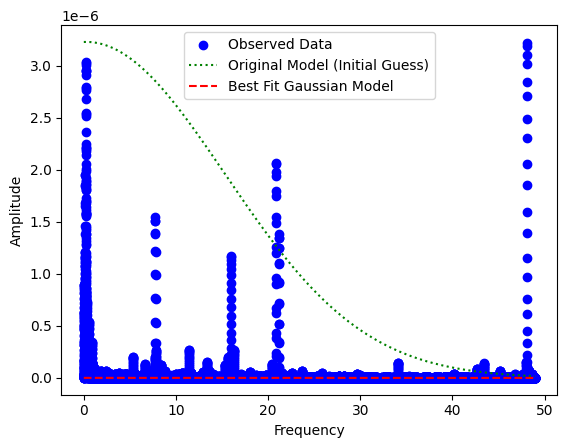

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Refined data for our expected model
ref_frequencies = np.array(refined_frequencies)
ref_powers = np.array(refined_powers)

# Observed data to compare with our model
observed_frequencies = np.array(pg_spacing_fmin.frequency.value)
observed_powers = np.array(pg_spacing_fmin.power.value)

print("Frequency range:", np.min(ref_frequencies), "to", np.max(ref_frequencies))
print("Amplitude range:", np.min(ref_powers), "to", np.max(ref_powers))

print("Frequency range:", np.min(observed_frequencies), "to", np.max(observed_frequencies))
print("Amplitude range:", np.min(observed_powers), "to", np.max(observed_powers))

# Defining the chi-squared function and selecting our initial parameters
# A is max power
# mu is median frequency
# sigma is standard deviation

# Initial guesses for the parameters (A, mu, sigma) based on the refined data
initial_guess = [np.max(ref_powers), np.median(ref_frequencies), np.std(ref_frequencies)]

def chi_squared(params):
    A, mu, sigma = params

    # This is our expected model
    model_predictions = A * np.exp(-0.5 * ((observed_frequencies - mu) ** 2) / sigma ** 2)

    # Using the chi-squared function to evaluate the error between our expected and observed values
    chi2 = np.sum(((observed_powers - model_predictions) ** 2) / observed_powers)
    return chi2

# Perform optimization to minimize chi-squared
result = minimize(chi_squared, initial_guess, method='Nelder-Mead')

# These are the new parameters (A, mu, sigma) after optimization
best_A, best_mu, best_sigma = result.x
print(f"Best-fit parameters: A = {best_A}, mu = {best_mu}, sigma = {best_sigma}")
print(f"Chi-squared: {result.fun}")

# Generate the original model predictions (using the initial guess)
original_model_predictions = initial_guess[0] * np.exp(-0.5 * ((observed_frequencies - initial_guess[1]) ** 2) / initial_guess[2] ** 2)

# Generate the new model predictions (after fitting)
new_model_predictions = best_A * np.exp(-0.5 * ((observed_frequencies - best_mu) ** 2) / best_sigma ** 2)

# Plot the observed data
plt.scatter(observed_frequencies, observed_powers, label="Observed Data", color='blue')

# Plot the original model predictions
plt.plot(observed_frequencies, original_model_predictions, label="Original Model (Initial Guess)", color='green', linestyle=':')

# Plot the new model predictions (after fitting)
plt.plot(observed_frequencies, new_model_predictions, label="Best Fit Gaussian Model", color='red', linestyle='--')

# Add labels and legend
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend()

# Show the plot
plt.show()
